In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
# Loading the datasets
fear_greed_df = pd.read_csv("fear_greed_index.csv")    
historical_df = pd.read_csv("historical_data.csv")     
# Format date columns
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'], errors='coerce')
fear_greed_df['date_only'] = fear_greed_df['date'].dt.date

# Convert & clean trader date
historical_df['Timestamp IST'] = pd.to_datetime(historical_df['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')
historical_df['date_only'] = historical_df['Timestamp IST'].dt.date

# Merge both datasets using 'date_only'
merged_df = pd.merge(
    historical_df,
    fear_greed_df[['date_only', 'classification']],
    on='date_only',
    how='left'
)

merged_df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date_only,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,2025-04-25 15:35:00,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12,2025-04-25,Greed
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,2025-04-25 15:35:00,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12,2025-04-25,Greed
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,2025-04-25 15:35:00,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12,2025-04-25,Greed
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,2025-04-25 15:35:00,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12,2025-04-25,Greed


In [60]:
merged_df['Closed PnL'] = pd.to_numeric(merged_df['Closed PnL'], errors='coerce')
merged_df['classification'] = merged_df['classification'].fillna("Unknown")


## <center> Distribution of Trends</center>

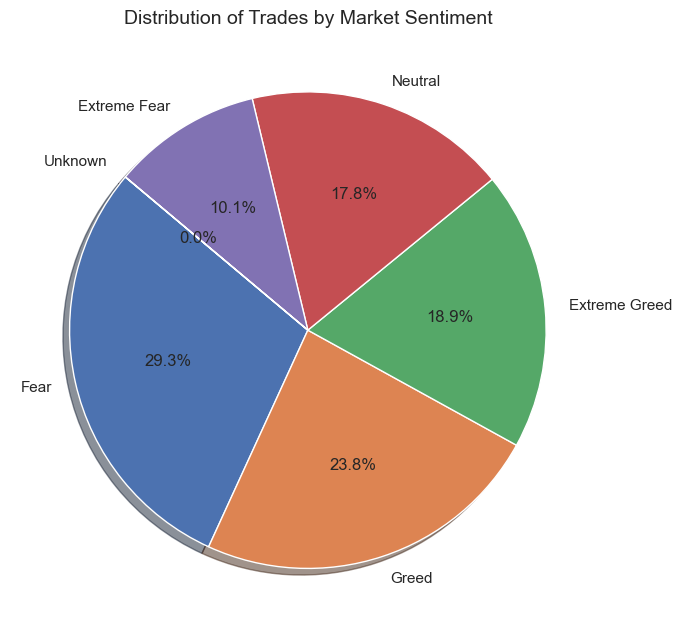

In [64]:
# Count of trades per sentiment
sentiment_counts = merged_df['classification'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    sentiment_counts.values,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    shadow=True
)

plt.title("Distribution of Trades by Market Sentiment", fontsize=14)
plt.tight_layout()
plt.show()


## <center> Win Rate by Market Sentiment </center>

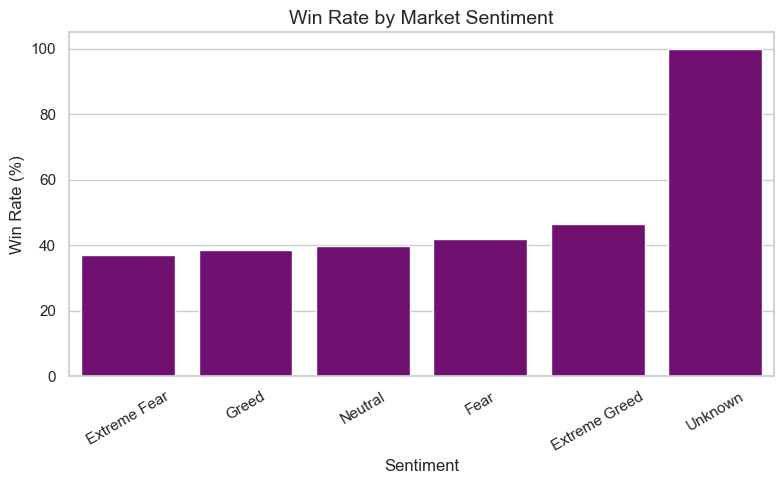

In [62]:
merged_df['is_win'] = merged_df['Closed PnL'] > 0
win_rate = merged_df.groupby('classification')['is_win'].mean().sort_values() * 100

plt.figure(figsize=(8, 5))
sns.barplot(
    x=win_rate.index,
    y=win_rate.values,
    color='purple'
)

plt.title("Win Rate by Market Sentiment", fontsize=14)
plt.ylabel("Win Rate (%)")
plt.xlabel("Sentiment")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


## <center> Profit/Loss Trends </center>

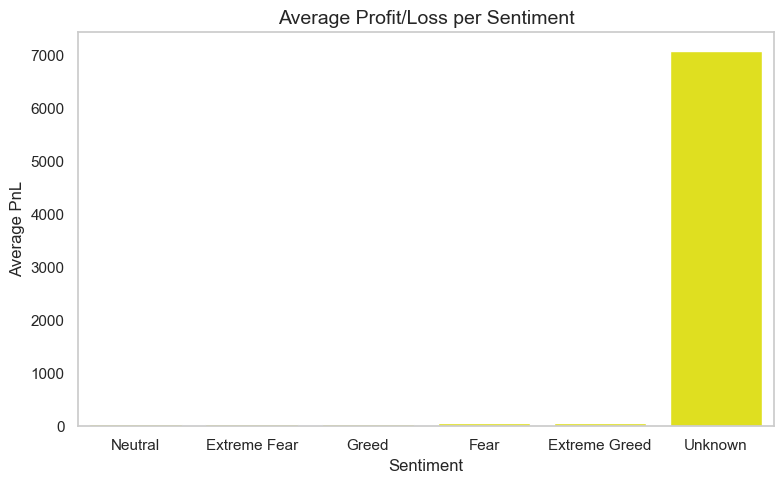

In [72]:

avg_pnl = merged_df.groupby('classification')['Closed PnL'].mean().sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_pnl.index, y=avg_pnl.values,color='yellow')

plt.title("Average Profit/Loss per Sentiment", fontsize=14)
plt.ylabel("Average PnL")
plt.xlabel("Sentiment")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## <center> Top 10 Traders by Profit on Greed Days </center>

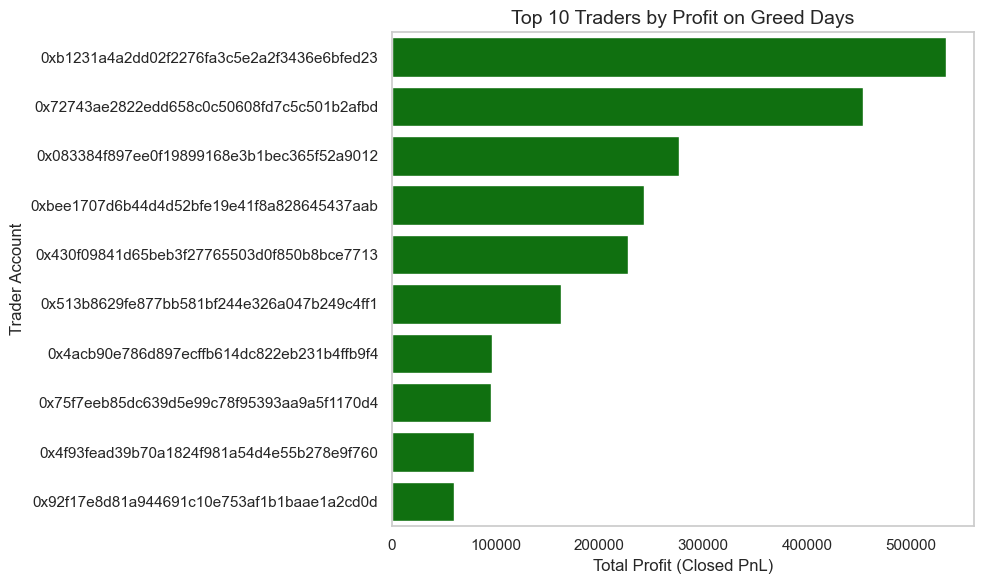

In [61]:
top_traders = merged_df.groupby(['Account', 'classification'])['Closed PnL'].sum().unstack()
top_greed = top_traders.sort_values(by='Greed', ascending=False).head(10)
# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_greed['Greed'],
    y=top_greed.index,
    color='green'
)

plt.title("Top 10 Traders by Profit on Greed Days", fontsize=14)
plt.xlabel("Total Profit (Closed PnL)")
plt.ylabel("Trader Account")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

## <center> Most Active Traders (Top 15 by Trade Count) </center>

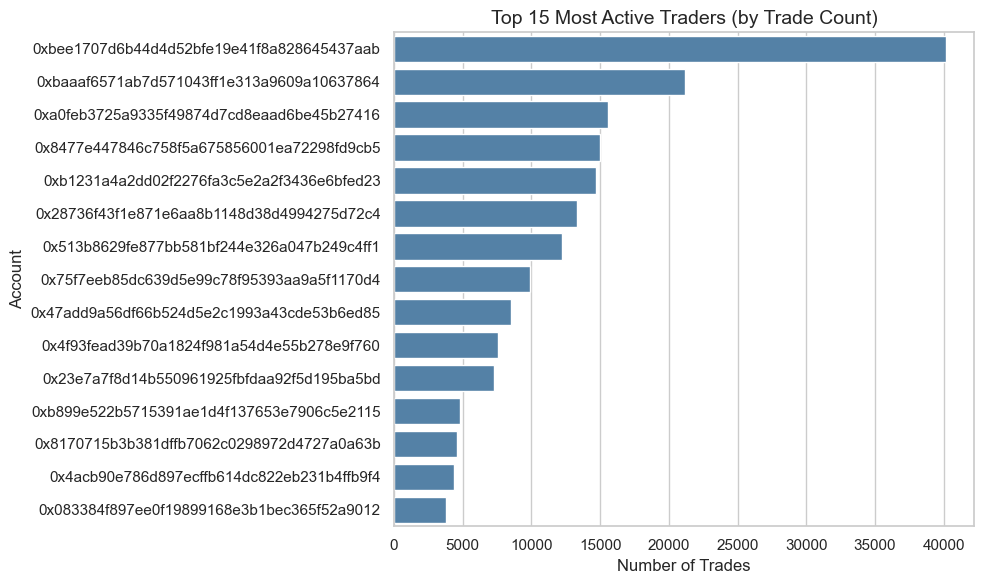

In [63]:
trade_counts = merged_df['Account'].value_counts().head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=trade_counts.values, y=trade_counts.index, color='steelblue')

plt.title("Top 15 Most Active Traders (by Trade Count)", fontsize=14)
plt.xlabel("Number of Trades")
plt.ylabel("Account")
plt.tight_layout()
plt.show()

## <center> Daily Total Profit/Loss </center>

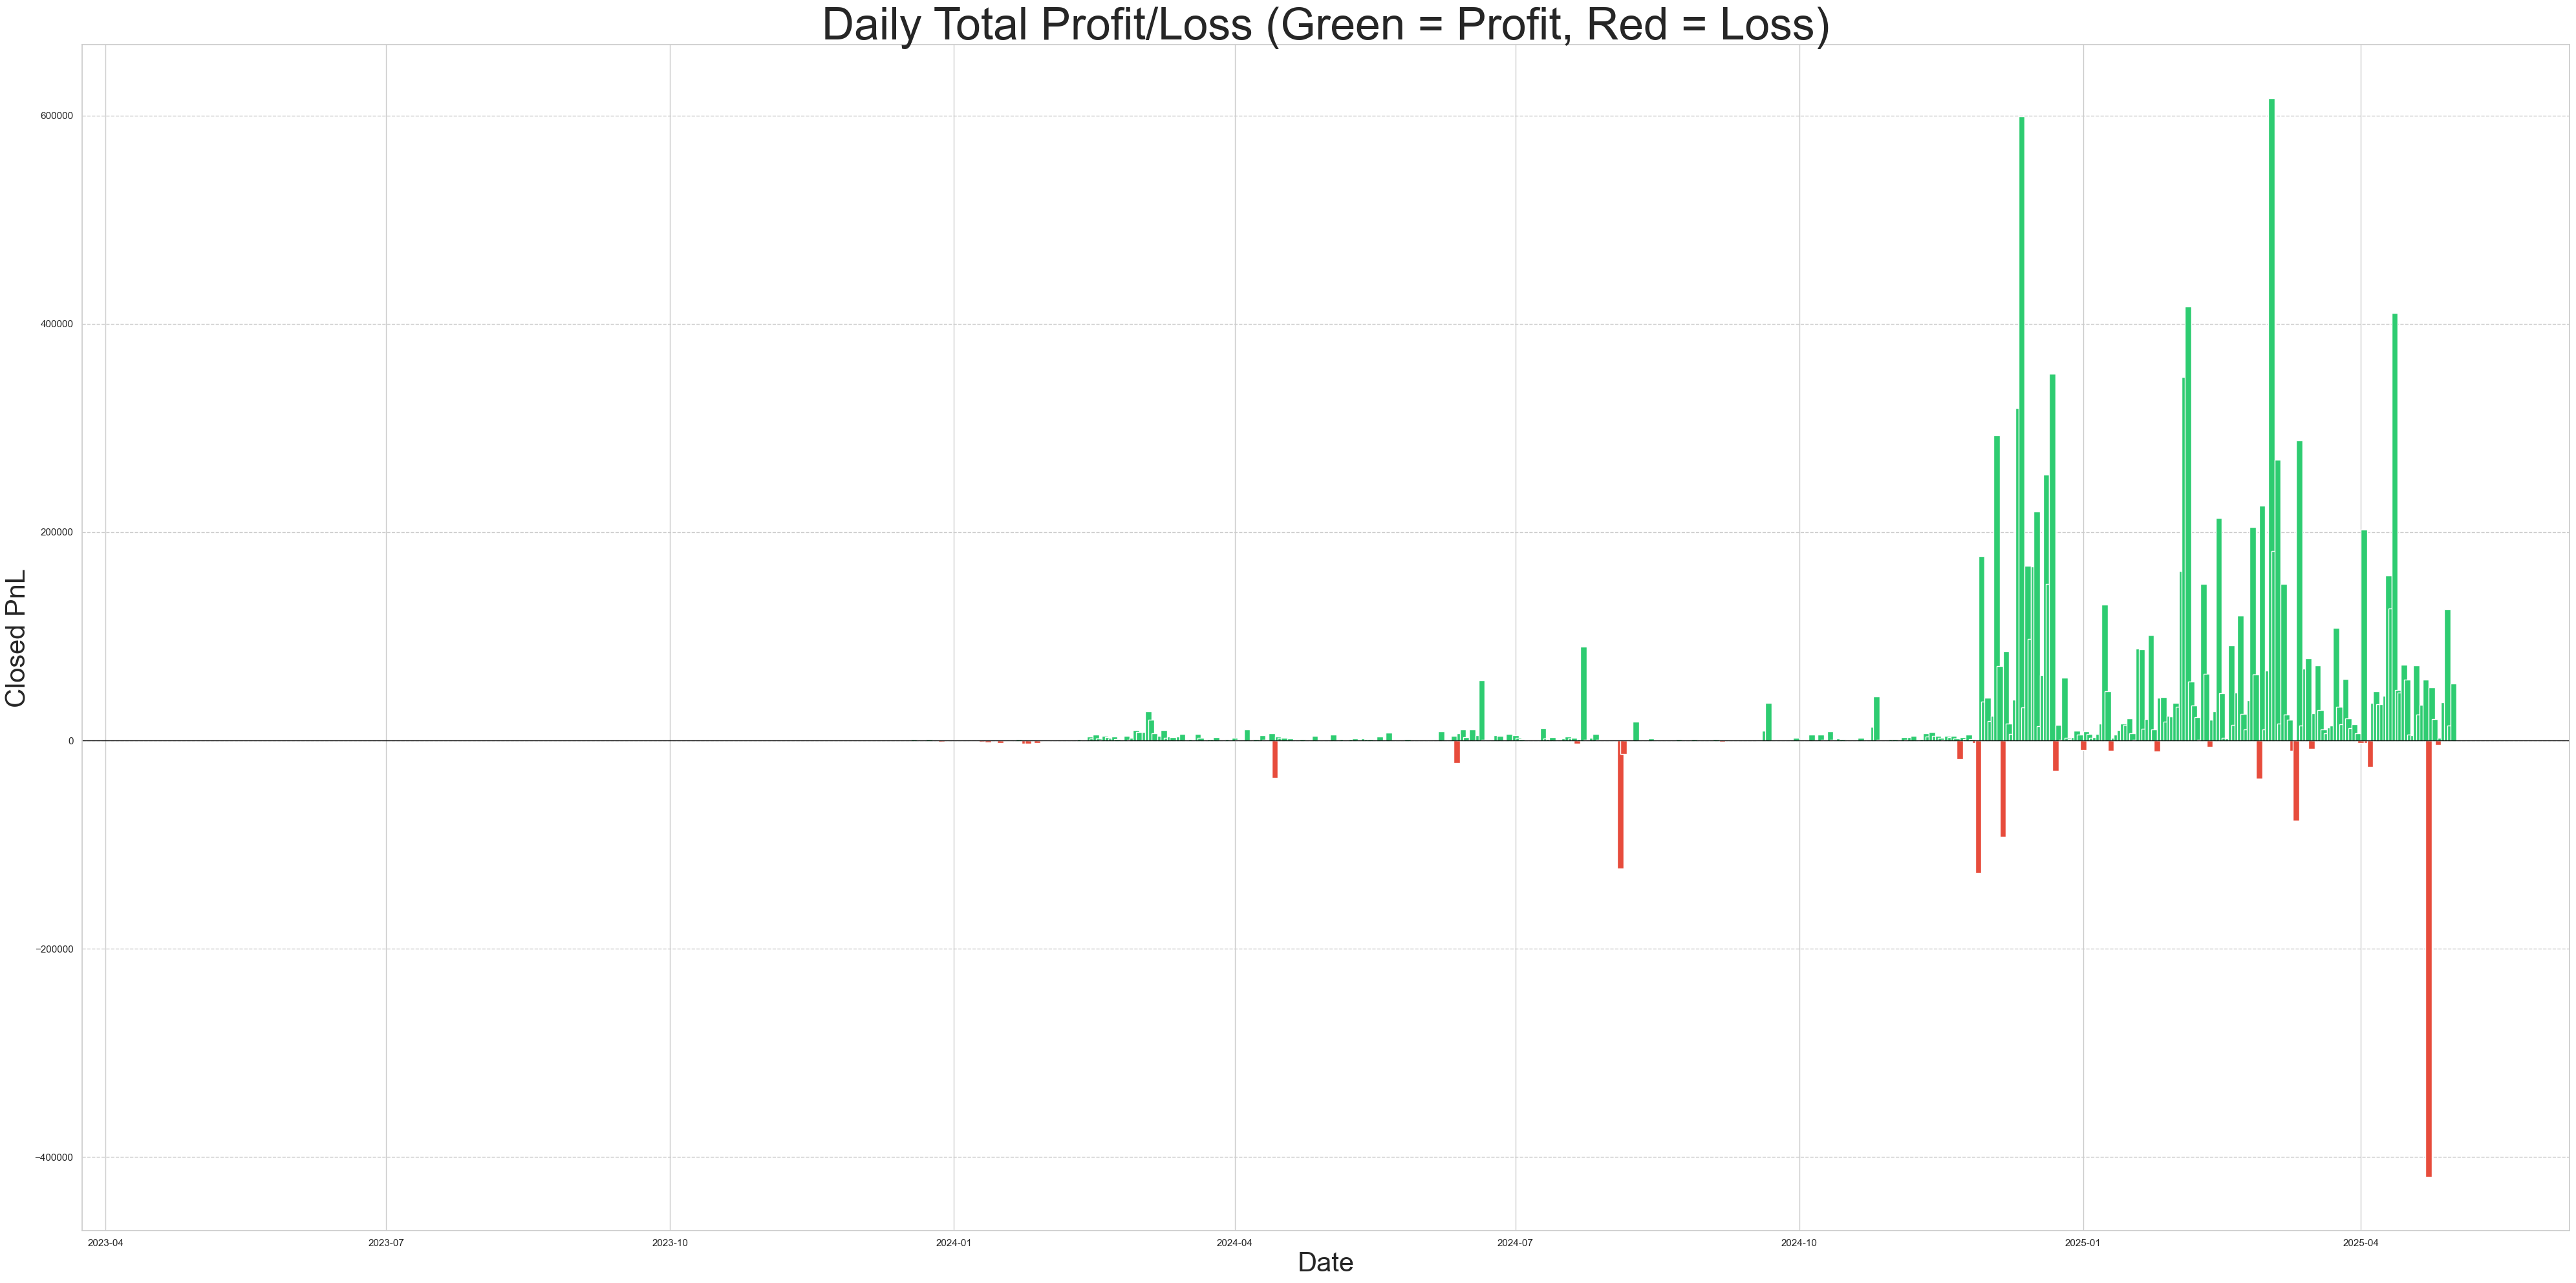

In [68]:
merged_df['date_only'] = pd.to_datetime(merged_df['date_only'])

# Daily profit/loss aggregation
daily_pnl = merged_df.groupby('date_only')['Closed PnL'].sum().sort_index()

# green for profit, red for loss
colors = ['#2ecc71' if val >= 0 else '#e74c3c' for val in daily_pnl]

plt.figure(figsize=(40, 20)) 

plt.bar(daily_pnl.index, daily_pnl.values, color=colors, width=2)

plt.axhline(0, color='black', linewidth=1)
plt.title("Daily Total Profit/Loss (Green = Profit, Red = Loss)", fontsize=50)
plt.xlabel("Date", fontsize=30)
plt.ylabel("Closed PnL", fontsize=30)

plt.grid(axis='y', linestyle='--', alpha=1)
plt.tight_layout()
plt.show()

## <center> Buy vs Sell Count </center>

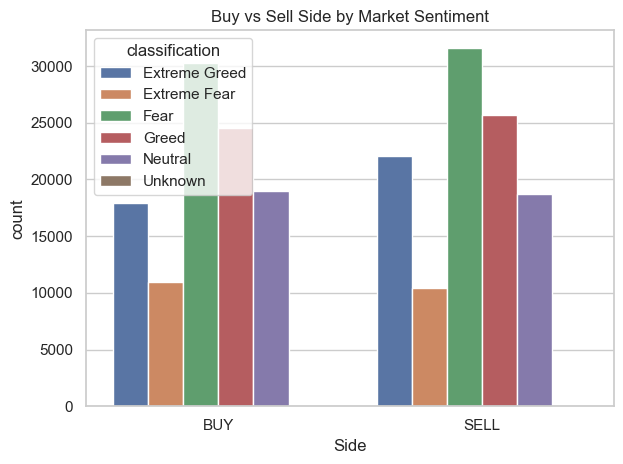

In [69]:
sns.countplot(x='Side', hue='classification', data=merged_df)
plt.title("Buy vs Sell Side by Market Sentiment")
plt.tight_layout()
plt.show()
